In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### <center>Марков Александр, НП-401<br><br>Метод наименьших квадратов</center>

In [2]:
def f(X):
    return np.sin(X / 5) * np.exp(X / 10) + 5 * np.exp(-1 * X / 2)

#### Построение многочлена произвольной степени

In [3]:
def approximation(domain, func, n_points):
    nodes = np.linspace(domain[0], domain[-1], n_points)
    
    x_matrix = np.array([
        np.array([x**i for i in range(0, len(nodes))])
        for i,x in enumerate(nodes)
    ])
    
    y_matrix = func(nodes)    
    weights = scipy.linalg.solve(x_matrix, y_matrix)
    
    image = np.array([
        w * np.power(domain, i)
        for i,w in enumerate(weights)
    ])
    
    return domain, image.sum(axis=0), weights

### Проверочка

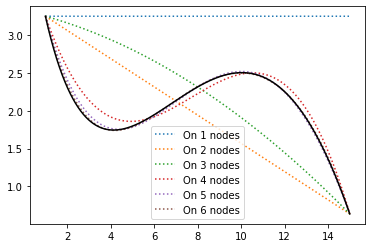

In [4]:
X = np.linspace(1, 15, 10000);

for nnodes in range(1, 7):
    domain, image, _ = approximation(X, f, nnodes);
    plt.plot(domain, image, linestyle=":", label=f"On {nnodes} nodes")

plt.plot(domain, f(domain), c="black", linestyle="-")
plt.legend()

### Коэффициенты:

In [5]:
_, _, weights = approximation(X, f, 4);
print(f"Коэффициенты: {np.round(weights, 2)}")

Коэффициенты: [ 4.23 -1.14  0.17 -0.01]


### Поиск коэффициентов другими методами
Через `scipy.linalg.inv` ищем так:
$$W * X = Y$$
$$W = X^{-1} * Y$$


In [6]:
import scipy

nodes = np.linspace(X[0], X[-1], 4)
    
x_matrix = np.array([
    np.array([x**i for i in range(0, 4)])
    for i,x in enumerate(nodes)
])
y_matrix = f(nodes)    

weights_solve = scipy.linalg.solve(x_matrix, y_matrix)
weights_lstsq = scipy.linalg.lstsq(x_matrix, y_matrix)[0]
weights_inv = scipy.linalg.inv(x_matrix) @ y_matrix

print("linalg.solve:\t", weights_solve)
print("linalg.lstsq:\t", weights_lstsq)
print("linalg.inv:\t", weights_inv)

linalg.solve:	 [ 4.22754506 -1.13727557  0.16923987 -0.00729249]
linalg.lstsq:	 [ 4.22754506 -1.13727557  0.16923987 -0.00729249]
linalg.inv:	 [ 4.22754506 -1.13727557  0.16923987 -0.00729249]
